In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [26]:
churnData = pd.read_csv("DATA_Customer-Churn.csv")

In [27]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [28]:
churnData.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [29]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [30]:
#churnData[['TotalCharges']] = churnData[['TotalCharges']].apply(pd.to_numeric)
#print(churnData.dtypes)

churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')
print(churnData.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [31]:
# Calculate the mean of the "TotalCharges" column
mean_total_charges = churnData['TotalCharges'].mean()

# Replace null values with the mean
churnData['TotalCharges'].fillna(mean_total_charges, inplace=True)


In [32]:
new_churndata = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn']]
print(new_churndata.head())


   tenure  SeniorCitizen  MonthlyCharges  TotalCharges Churn
0       1              0           29.85         29.85    No
1      34              0           56.95       1889.50    No
2       2              0           53.85        108.15   Yes
3      45              0           42.30       1840.75    No
4       2              0           70.70        151.65   Yes


In [47]:
# get dummies for the 'fruit' variable
dummies = pd.get_dummies(new_churndata['Churn'])

# concatenate the dummies with the original DataFrame
new_churndata = pd.concat([new_churndata, dummies], axis=1)

# display the resulting DataFrame
print(new_churndata)

        tenure  SeniorCitizen  MonthlyCharges  TotalCharges Churn  No  Yes
0    -1.277445      -0.439916       -1.160323     -0.994971    No   1    0
1     0.066327      -0.439916       -0.259629     -0.173876    No   1    0
2    -1.236724      -0.439916       -0.362660     -0.960399   Yes   0    1
3     0.514251      -0.439916       -0.746535     -0.195400    No   1    0
4    -1.236724      -0.439916        0.197365     -0.941193   Yes   0    1
...        ...            ...             ...           ...   ...  ..  ...
7038 -0.340876      -0.439916        0.665992     -0.129281    No   1    0
7039  1.613701      -0.439916        1.277533      2.242808    No   1    0
7040 -0.870241      -0.439916       -1.168632     -0.855182    No   1    0
7041 -1.155283       2.273159        0.320338     -0.872777   Yes   0    1
7042  1.369379      -0.439916        1.358961      2.013917    No   1    0

[7043 rows x 7 columns]


In [50]:
new_churndata = new_churndata.drop('No', axis=1)
new_churndata = new_churndata.drop('Yes', axis=1) #run once already


KeyError: "['No'] not found in axis"

In [52]:
new_churndata = new_churndata.drop('Yes', axis=1)

In [53]:
new_churndata

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,-1.277445,-0.439916,-1.160323,-0.994971,No
1,0.066327,-0.439916,-0.259629,-0.173876,No
2,-1.236724,-0.439916,-0.362660,-0.960399,Yes
3,0.514251,-0.439916,-0.746535,-0.195400,No
4,-1.236724,-0.439916,0.197365,-0.941193,Yes
...,...,...,...,...,...
7038,-0.340876,-0.439916,0.665992,-0.129281,No
7039,1.613701,-0.439916,1.277533,2.242808,No
7040,-0.870241,-0.439916,-1.168632,-0.855182,No
7041,-1.155283,2.273159,0.320338,-0.872777,Yes


In [54]:
new_churndata['Churn'] = new_churndata['Churn'].replace(['Yes'], '1')
new_churndata['Churn'] = new_churndata['Churn'].replace(['No'], '0')

In [55]:
new_churndata

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,-1.277445,-0.439916,-1.160323,-0.994971,0
1,0.066327,-0.439916,-0.259629,-0.173876,0
2,-1.236724,-0.439916,-0.362660,-0.960399,1
3,0.514251,-0.439916,-0.746535,-0.195400,0
4,-1.236724,-0.439916,0.197365,-0.941193,1
...,...,...,...,...,...
7038,-0.340876,-0.439916,0.665992,-0.129281,0
7039,1.613701,-0.439916,1.277533,2.242808,0
7040,-0.870241,-0.439916,-1.168632,-0.855182,0
7041,-1.155283,2.273159,0.320338,-0.872777,1


In [56]:
TT_SPLIT = 0.2     
RAND_STATE = 123   

In [57]:
X = new_churndata.drop('Churn', axis=1)
y = new_churndata.Churn


In [58]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=TT_SPLIT,random_state=RAND_STATE)

In [59]:
from sklearn.preprocessing import StandardScaler

# create a StandardScaler object
scaler = StandardScaler()

# select the columns you want to normalize
cols_to_scale = ['tenure', 'SeniorCitizen','MonthlyCharges', 'TotalCharges']

# normalize the selected columns
new_churndata[cols_to_scale] = scaler.fit_transform(new_churndata[cols_to_scale])

# display the normalized DataFrame
print(new_churndata.head())


     tenure  SeniorCitizen  MonthlyCharges  TotalCharges Churn
0 -1.277445      -0.439916       -1.160323     -0.994971     0
1  0.066327      -0.439916       -0.259629     -0.173876     0
2 -1.236724      -0.439916       -0.362660     -0.960399     1
3  0.514251      -0.439916       -0.746535     -0.195400     0
4 -1.236724      -0.439916        0.197365     -0.941193     1


In [60]:
new_churndata

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,-1.277445,-0.439916,-1.160323,-0.994971,0
1,0.066327,-0.439916,-0.259629,-0.173876,0
2,-1.236724,-0.439916,-0.362660,-0.960399,1
3,0.514251,-0.439916,-0.746535,-0.195400,0
4,-1.236724,-0.439916,0.197365,-0.941193,1
...,...,...,...,...,...
7038,-0.340876,-0.439916,0.665992,-0.129281,0
7039,1.613701,-0.439916,1.277533,2.242808,0
7040,-0.870241,-0.439916,-1.168632,-0.855182,0
7041,-1.155283,2.273159,0.320338,-0.872777,1


In [61]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=TT_SPLIT,random_state=RAND_STATE)

In [62]:
X_train_scaled = scaler.fit_transform(X_train)

In [63]:
X_test_scaled = scaler.transform(X_test)

In [64]:
model = KNeighborsClassifier(n_neighbors=1,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)
#model.predict_proba(inputdata)

In [65]:
y_pred

array(['0', '0', '0', ..., '1', '0', '0'], dtype=object)

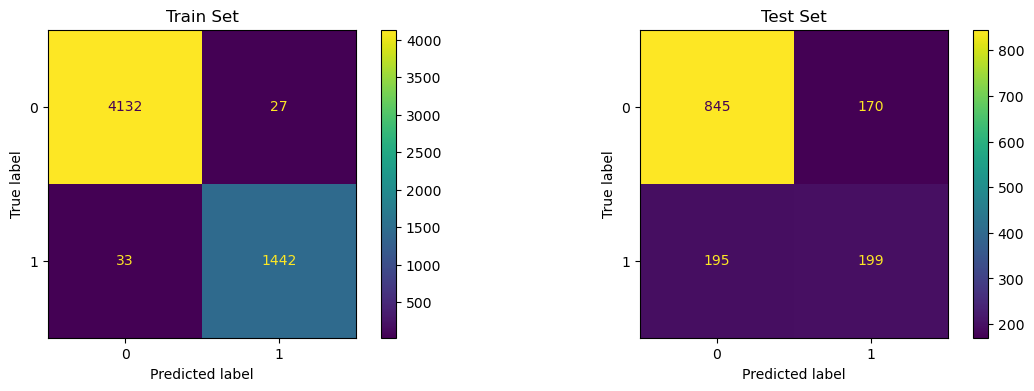

In [66]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [67]:
y = y.astype(int)
#run later after dummies 

In [68]:
model = KNeighborsClassifier(n_neighbors=2,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)
#model.predict_proba(inputdata)

In [69]:
y_pred

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

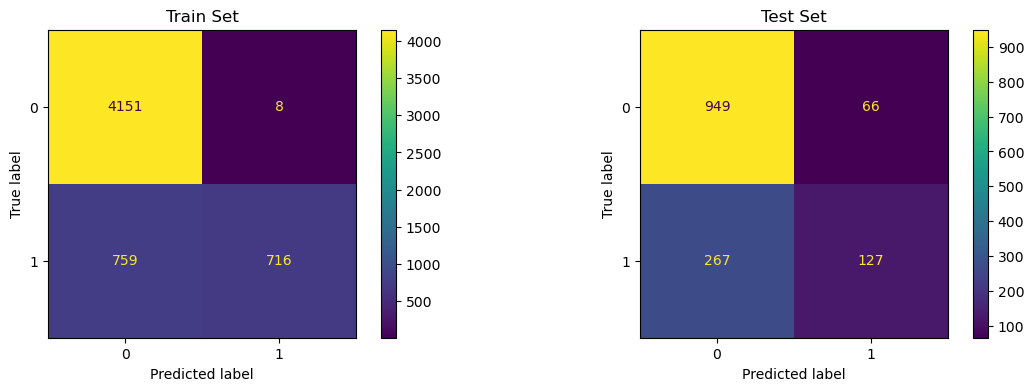

In [70]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [71]:
model = KNeighborsClassifier(n_neighbors=3,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)
#model.predict_proba(inputdata)

In [72]:
y_pred

array(['0', '0', '0', ..., '1', '0', '0'], dtype=object)

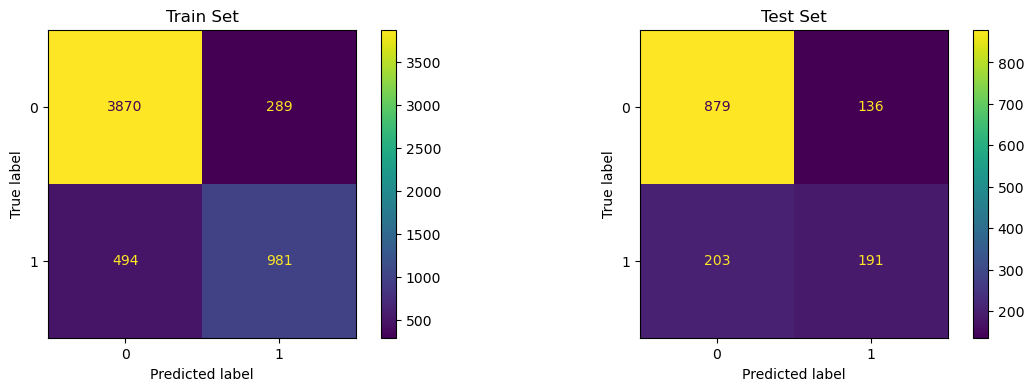

In [73]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [74]:
model = KNeighborsClassifier(n_neighbors=4,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)
#model.predict_proba(inputdata)

In [75]:
y_pred

array(['0', '0', '0', ..., '1', '0', '0'], dtype=object)

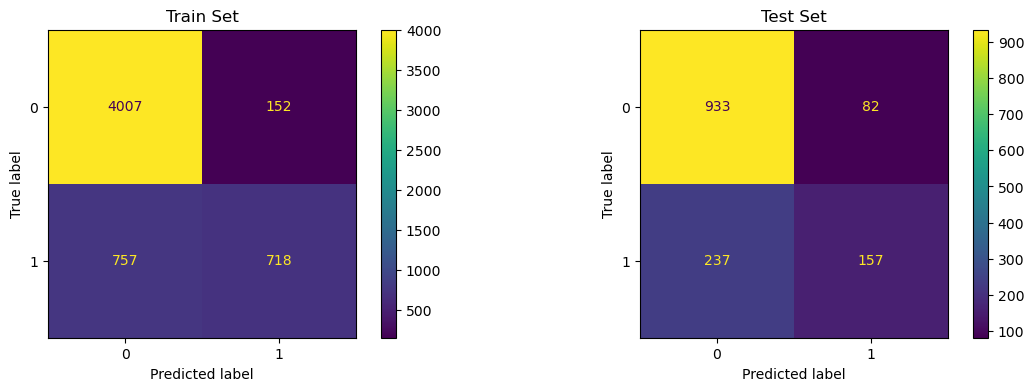

In [76]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [77]:
model = KNeighborsClassifier(n_neighbors=5,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)
#model.predict_proba(inputdata)

In [78]:
y_pred

array(['0', '0', '0', ..., '1', '0', '0'], dtype=object)

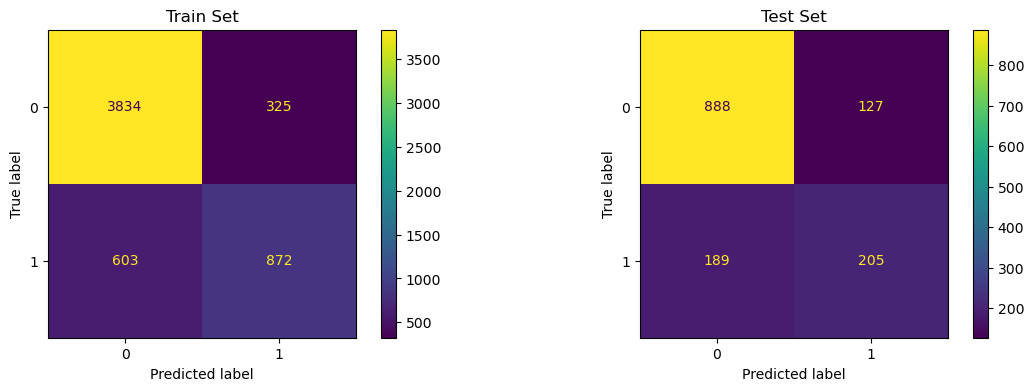

In [79]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [83]:
model = KNeighborsClassifier(n_neighbors=6,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)
#model.predict_proba(inputdata)

In [84]:
y_pred

array(['0', '0', '0', ..., '1', '0', '0'], dtype=object)

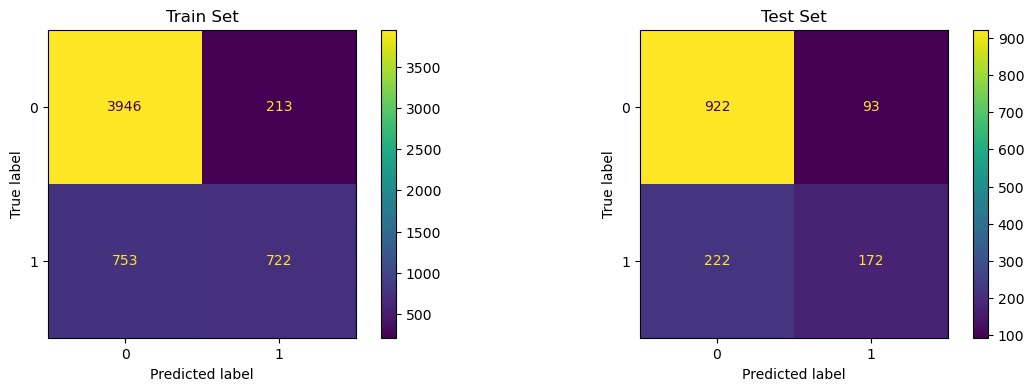

In [85]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [86]:
model = KNeighborsClassifier(n_neighbors=7,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)
#model.predict_proba(inputdata)

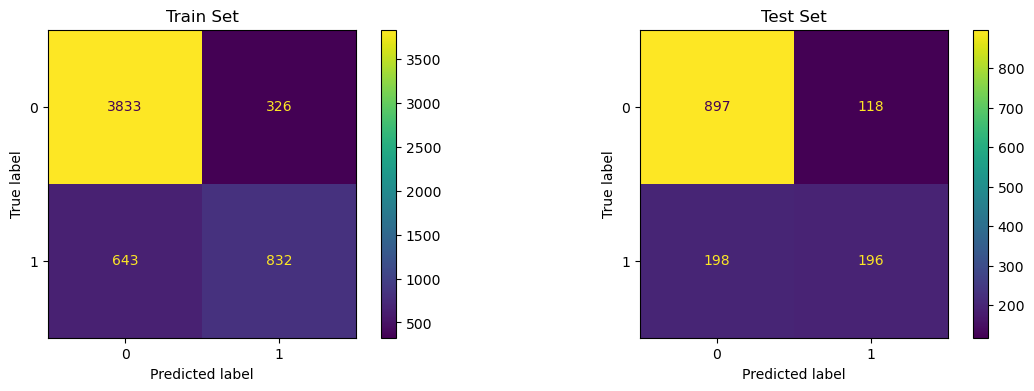

In [87]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [88]:
model = KNeighborsClassifier(n_neighbors=8,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)
#model.predict_proba(inputdata)

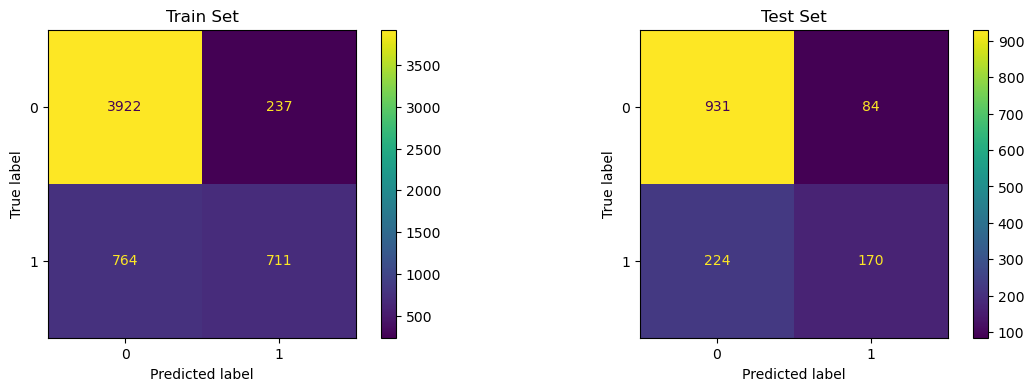

In [89]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [90]:
model = KNeighborsClassifier(n_neighbors=9,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)
#model.predict_proba(inputdata)

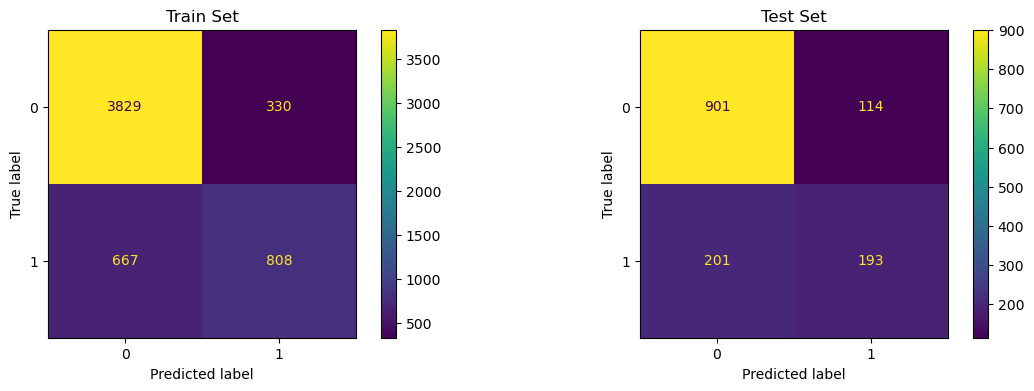

In [91]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [95]:
model = KNeighborsClassifier(n_neighbors=10,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)
#model.predict_proba(inputdata)

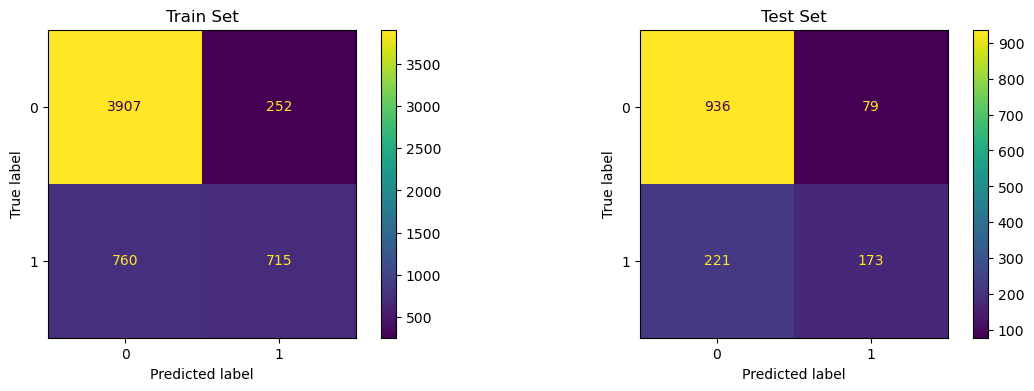

In [96]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [93]:
model = KNeighborsClassifier(n_neighbors=11,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)
#model.predict_proba(inputdata)

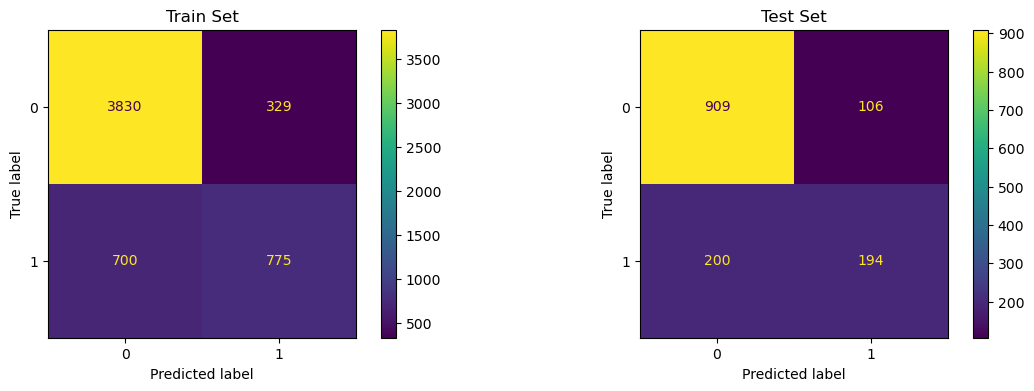

In [94]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [97]:
model = KNeighborsClassifier(n_neighbors=12,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)
#model.predict_proba(inputdata)

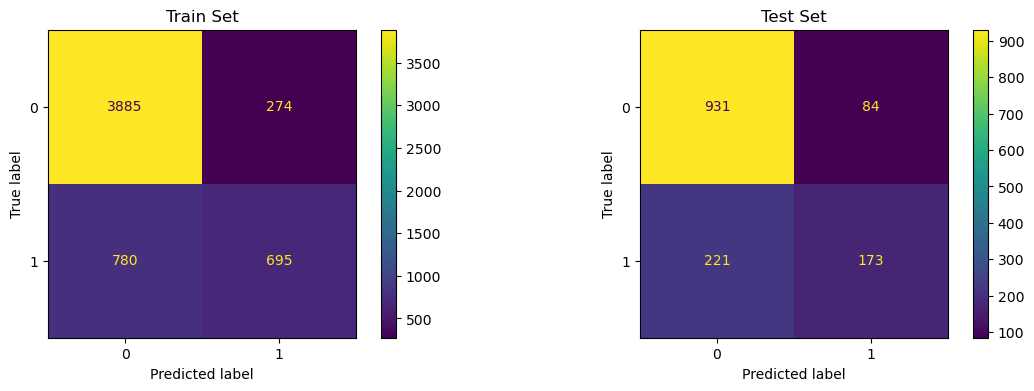

In [98]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [99]:
model = KNeighborsClassifier(n_neighbors=13,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)
#model.predict_proba(inputdata)

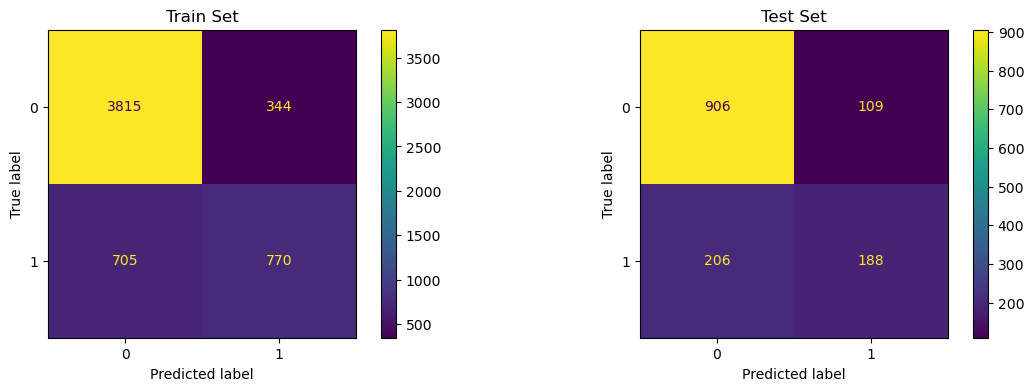

In [100]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [101]:
model = KNeighborsClassifier(n_neighbors=14,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)
#model.predict_proba(inputdata)

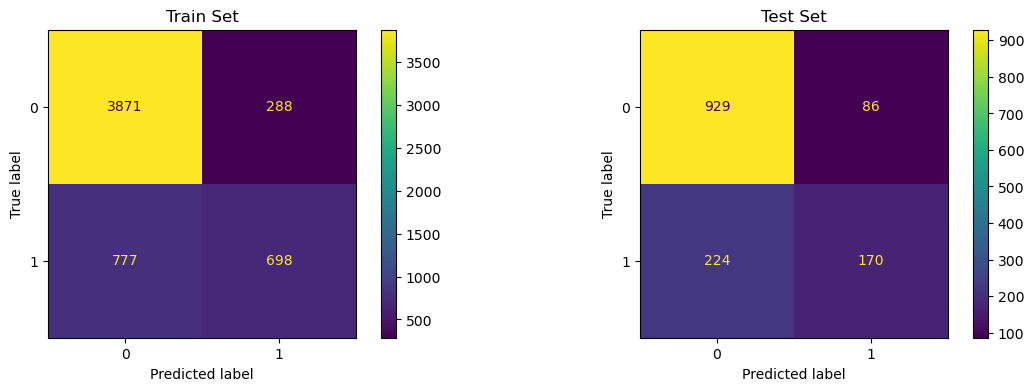

In [102]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [103]:
model = KNeighborsClassifier(n_neighbors=15,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)
#model.predict_proba(inputdata)

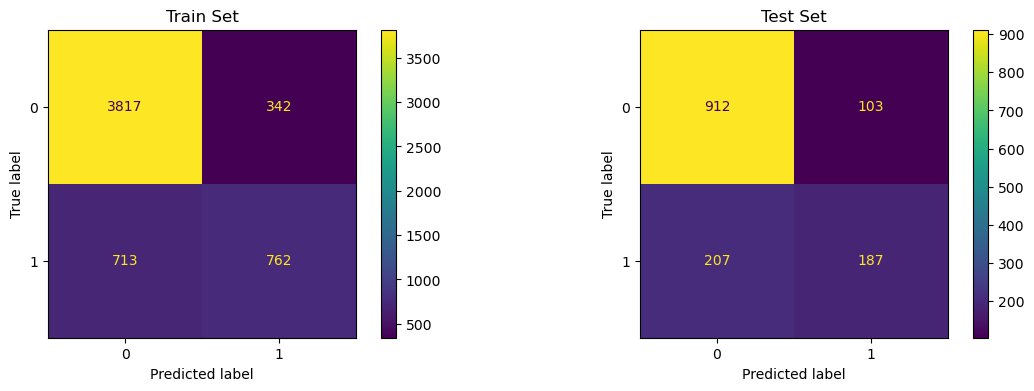

In [104]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

,Error_metric,Train,Test
0,Accuracy,0.794640,0.781405
1,Precision,0.660282,0.665385
2,Recall,0.444068,0.439086


Confusion matrix for the train set
[[3822  337]
 [ 820  655]]


Confusion matrix for the test set
[[928  87]
 [221 173]]


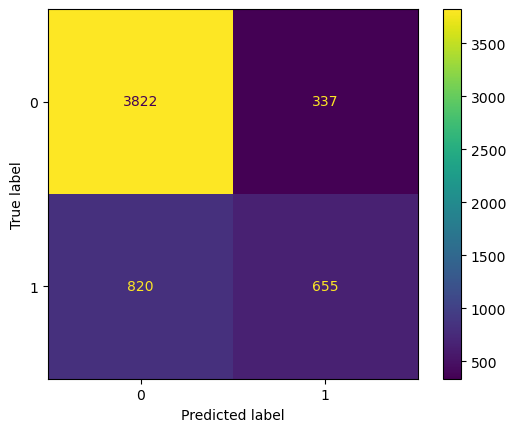

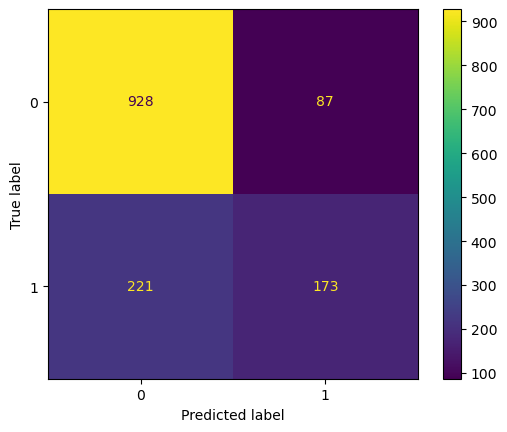

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


log_model = LogisticRegression() 

## Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')


print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')


In [ ]:
#create a function for each one of the case we will check accuracy precision and recall for the lab. 
#from 1 to 15

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# define the range of k values to try
k_range = range(1, 16)

# loop over different values of k
for k in k_range:
    # train a k-nearest neighbors classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # predict the test set labels
    y_pred = knn.predict(X_test_scaled)
    
    # evaluate the accuracy of a logistic regression model on the test set
    lr = LogisticRegression(max_iter=10000)
    lr.fit(X_train_scaled, y_train)
    lr_pred = lr.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, lr_pred)
    
    # print the accuracy for this value of k
    print("k=%d, accuracy=%.2f%%" % (k, accuracy * 100))


k=1, accuracy=78.07%
k=2, accuracy=78.07%
k=3, accuracy=78.07%
k=4, accuracy=78.07%
k=5, accuracy=78.07%
k=6, accuracy=78.07%
k=7, accuracy=78.07%
k=8, accuracy=78.07%
k=9, accuracy=78.07%
k=10, accuracy=78.07%
k=11, accuracy=78.07%
k=12, accuracy=78.07%
k=13, accuracy=78.07%
k=14, accuracy=78.07%
k=15, accuracy=78.07%


In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np


accuracies = np.zeros(15)


for k in range(1, 16):
 
    knn = KNeighborsClassifier(n_neighbors=k)
  
    knn.fit(X_train_scaled, y_train)
    
    y_pred = knn.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    accuracies[k-1] = accuracy
    
    print("k=%d, accuracy=%.2f%%" % (k, accuracy * 100))

best_k = np.argmax(accuracies) + 1
print("Best value of k:", best_k)



k=1, accuracy=74.10%
k=2, accuracy=76.37%
k=3, accuracy=75.94%
k=4, accuracy=77.36%
k=5, accuracy=77.57%
k=6, accuracy=77.64%
k=7, accuracy=77.57%
k=8, accuracy=78.14%
k=9, accuracy=77.64%
k=10, accuracy=78.71%
k=11, accuracy=78.28%
k=12, accuracy=78.35%
k=13, accuracy=77.64%
k=14, accuracy=78.00%
k=15, accuracy=78.00%
Best value of k: 10


In [ ]:
# train logistic regression model with best value of k
#knn = KNeighborsClassifier(n_neighbors=best_k)
#knn.fit(X_train, y_train)
#lr = LogisticRegression()
#lr.fit(knn.transform(X_train_scaled), y_train
